## Impurity PM10 Data set.

In [1]:
import pandas as pd # import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 



# Load Impurities data

In [2]:
# check working directory before import
%pwd


'/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector'

In [3]:
# change to directory where the file is
%cd CSV_file_from_2007_to_2017 

/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017


In [4]:
# see the impurities values we have
import os
list_dataset =os.listdir('/Users/Seychelles/Desktop/GoogleTensorflow/Data_Collector/CSV_file_from_2007_to_2017')

In [5]:
list_dataset # from this we load only for PM10 region skopje

['EasternRegion_CO_airpointers.csv',
 'EasternRegion_NO2_airpointers.csv',
 'EasternRegion_O3_airpointers.csv',
 'EasternRegion_PM10_airpointers.csv',
 'EasternRegion_PM25_airpointers.csv',
 'EasternRegion_SO2_airpointers.csv',
 'outfile',
 'outfile1',
 'SkopjeRegion_CO_airpointers.csv',
 'SkopjeRegion_NO2_airpointers.csv',
 'SkopjeRegion_O3_airpointers.csv',
 'SkopjeRegion_PM10_airpointers.csv',
 'SkopjeRegion_PM25_airpointers.csv',
 'SkopjeRegion_SO2_airpointers.csv',
 'WesternRegion_CO_airpointers.csv',
 'WesternRegion_NO2_airpointers.csv',
 'WesternRegion_O3_airpointers.csv',
 'WesternRegion_PM10_airpointers.csv',
 'WesternRegion_PM25_airpointers.csv',
 'WesternRegion_SO2_airpointers.csv']

In [6]:
pollution_PM = pd.read_csv("SkopjeRegion_PM10_airpointers.csv") #load data set

In [7]:
# View Data
pollution_PM.tail()

,DATE_TIME;LAT;LON;PM10;NAME
626495,14.12.2016 09;42.006667;21.386944;79.07;Karpos
626496,14.12.2016 09;41.977821;21.464474;110.39;Lisice
626497,14.12.2016 09;41.999200;21.440800;72.11;Rektorat
626498,14.12.2016 09;42.015800;21.650600;;Mrsevci
626499,14.12.2016 09;41.987500;21.652500;59.73;Miladi...


In [8]:
pollution_PM=pollution_PM.rename(columns = {'DATE_TIME;LAT;LON;PM10;NAME':'pm10'})
# change the column name to something simplecolumn name to facilitate 
# This will facilitate separation of columns into various components.

In [9]:
pollution_PM.columns.dtype # The columns are all of object type

dtype('O')

In [10]:
pollution_PM.tail()

,pm10
626495,14.12.2016 09;42.006667;21.386944;79.07;Karpos
626496,14.12.2016 09;41.977821;21.464474;110.39;Lisice
626497,14.12.2016 09;41.999200;21.440800;72.11;Rektorat
626498,14.12.2016 09;42.015800;21.650600;;Mrsevci
626499,14.12.2016 09;41.987500;21.652500;59.73;Miladi...


### Column Separation

<p> Seperate data set into appropriate columns: </p>

In [11]:
df_ = pd.DataFrame(pollution_PM.pm10.str.split(';',4).tolist(),columns = ['date','Lat','Lon','PM10','NAME'])

In [12]:
df_[1:10]

,date,Lat,Lon,PM10,NAME
1,26.01.2007 10,42.003600,21.463600,,Gazi Baba
2,26.01.2007 10,42.006667,21.386944,61.67,Karpos
3,26.01.2007 10,41.977821,21.464474,,Lisice
4,26.01.2007 10,41.999200,21.440800,95.57,Rektorat
5,26.01.2007 10,42.015800,21.650600,,Mrsevci
6,26.01.2007 10,41.987500,21.652500,,Miladinovci
7,15.01.2007 01,41.992500,21.423611,,Centar
8,15.01.2007 01,42.003600,21.463600,,Gazi Baba
9,15.01.2007 01,42.006667,21.386944,298.28,Karpos


## Data  Type Conversion And Label Encoding

<p> Convert <b>PM10</b> to Numeric dtype: </p>

In [13]:
df_['PM10']= pd.to_numeric(df_['PM10']) # Convert PM_10 column to Numeric Values

<p> For the column with categorical variables we will look at the unique values present. The column name represent the municipality present. </p>


<b> Label Encoding </b>

In [14]:
df_.NAME.unique()

array(['Centar', 'Gazi Baba', 'Karpos', 'Lisice', 'Rektorat', 'Mrsevci',
       'Miladinovci'], dtype=object)

<p> We will sklearn to encode the categorical variables: </p>

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [16]:
le = preprocessing.LabelEncoder()
le.fit(df_.NAME.values)

LabelEncoder()

In [17]:
list(le.classes_)

['Centar',
 'Gazi Baba',
 'Karpos',
 'Lisice',
 'Miladinovci',
 'Mrsevci',
 'Rektorat']

In [18]:
df_["NAME"] =le.transform(df_.NAME) # Note that the encoding is done according to the first letter 
                                    # of the variable

In [19]:
df_.NAME.unique()

array([0, 1, 2, 3, 6, 5, 4])

In [20]:
df_[1:5]

,date,Lat,Lon,PM10,NAME
1,26.01.2007 10,42.003600,21.463600,NaN,1
2,26.01.2007 10,42.006667,21.386944,61.67,2
3,26.01.2007 10,41.977821,21.464474,NaN,3
4,26.01.2007 10,41.999200,21.440800,95.57,6


#  Missing Values 

From inspection only PM10, which is the variable to be predicited contain missing values:

In [21]:
#percentage of null in wole data set
df_.isnull().sum()



date         0
Lat          0
Lon          0
PM10    255713
NAME         0
dtype: int64

In [22]:
#percentage of null in PM_10

df_.PM10.isnull().sum()/df_.PM10.size * 100

40.81612130885874

In [23]:
# Replace Nan with np.na for easy computation

In [25]:
df_['PM10'].replace('NaN', np.NaN)[1:3]

1      NaN
2    61.67
Name: PM10, dtype: float64

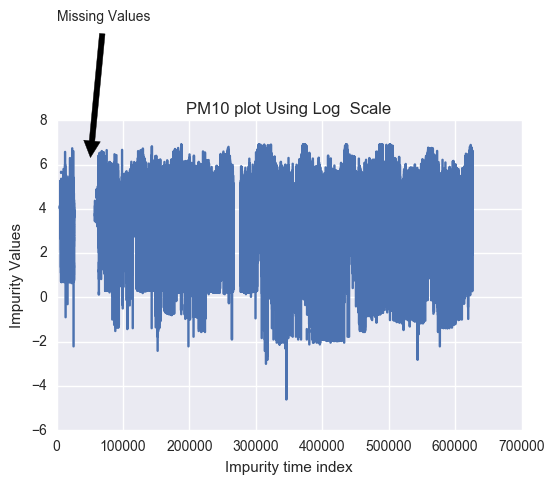

In [25]:
plt.plot(np.log(df_.PM10.values))
plt.title("PM10 plot Using Log  Scale")
plt.ylabel("Impurity Values")
plt.xlabel("Impurity time index")
plt.annotate('Missing Values', xy=(50000,6), xytext=(8,12.5), arrowprops= dict(facecolor='black',
             shrink=0.05),)

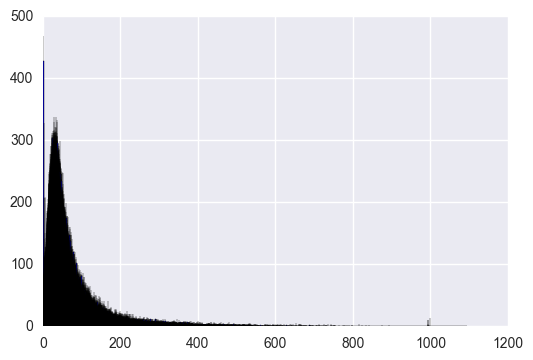

In [26]:
%matplotlib inline  
df_.PM10.hist(bins=20000,color='blue',bottom=0.1)


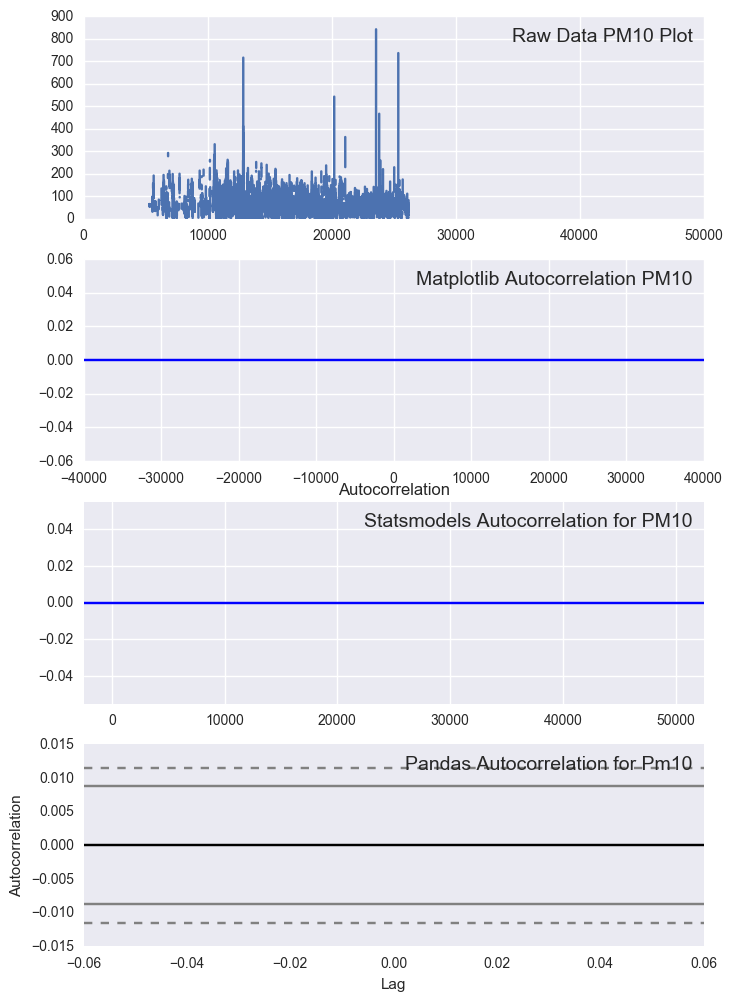

In [29]:
from pandas.tools.plotting import autocorrelation_plot

from statsmodels.graphics import tsaplots
fig, axes = plt.subplots(nrows=4, figsize=(8, 12))
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -8), ha='right', va='top',
                size=14, xycoords='axes fraction', textcoords='offset points')
    
axes[0].plot(df_.PM10[1:50000])
label(axes[0],'Raw Data PM10 Plot')

axes[1].acorr(df_.PM10[1:50000], maxlags=df_.PM10[1:50000].size-10000)
label(axes[1], 'Matplotlib Autocorrelation PM10')
print('\n')

tsaplots.plot_acf(df_.PM10[1:50000], axes[2])
label(axes[2], 'Statsmodels Autocorrelation for PM10')

pd.tools.plotting.autocorrelation_plot(df_.PM10[1:50000], ax=axes[3])
label(axes[3], 'Pandas Autocorrelation for Pm10')


plt.show()

## Cleaning Up the Whole data sets And Standardization

In [73]:
df_.columns

Index(['date', 'Lat', 'Lon', 'PM10', 'NAME'], dtype='object')

In [74]:
df_.dtypes

date     object
Lat      object
Lon      object
PM10    float64
NAME      int64
dtype: object

## Date extraction 

---
<p> We extract the month, hour and time for use in  our model. In additon we will compute the time difference: this caters for the non uniform intervals in time readings. </p>


In [26]:
df_.date[1:3]

1    26.01.2007 10
2    26.01.2007 10
Name: date, dtype: object

In [27]:
df_.date = pd.to_datetime(df_.date) # convert date to date time datatype

In [28]:
df_.date[1:2] # view data set

1   2007-01-26 10:00:00
Name: date, dtype: datetime64[ns]

In [185]:
#get the months and day values
temp = pd.DatetimeIndex(df_['date'])
#pandas['date'] = temp.date
df_['time'] = temp.time
df_['month'] = temp.month
df_['day'] = temp.day

In [186]:
#View the data set to be sure
df_.head()

,date,Lat,Lon,PM10,NAME,time,month,day
0,2007-01-26 10:00:00,41.992500,21.423611,NaN,0,10:00:00,1,26
1,2007-01-26 10:00:00,42.003600,21.463600,NaN,1,10:00:00,1,26
2,2007-01-26 10:00:00,42.006667,21.386944,61.67,2,10:00:00,1,26
3,2007-01-26 10:00:00,41.977821,21.464474,NaN,3,10:00:00,1,26
4,2007-01-26 10:00:00,41.999200,21.440800,95.57,6,10:00:00,1,26


----
<p> We extract the time from the "time" column. </p>

In [188]:
df_['time'] = pd.to_datetime(df_['time'].astype(str), format='%H:%M:%S').dt.hour

In [189]:
df_.head()

,date,Lat,Lon,PM10,NAME,time,month,day
0,2007-01-26 10:00:00,41.992500,21.423611,NaN,0,10,1,26
1,2007-01-26 10:00:00,42.003600,21.463600,NaN,1,10,1,26
2,2007-01-26 10:00:00,42.006667,21.386944,61.67,2,10,1,26
3,2007-01-26 10:00:00,41.977821,21.464474,NaN,3,10,1,26
4,2007-01-26 10:00:00,41.999200,21.440800,95.57,6,10,1,26


-----
<p> From the date time we extract the days and time intervals</p>

In [207]:
df_['daysInterval']=df_['date'] - df_['date'].shift() # we use to learn the non uniformities in transition

In [209]:
df_.daysInterval.isnull().sum() # we observe only the first value is NAT(==NAN). We fill this with zero

1

In [ ]:
# Fill this missing value with 0

In [210]:
df_.daysInterval.fillna(0,inplace=True);

In [219]:
df_[0:9] #view data

,date,Lat,Lon,PM10,NAME,time,month,day,daysInterval
0,2007-01-26 10:00:00,41.992500,21.423611,NaN,0,10,1,26,0 days 00:00:00
1,2007-01-26 10:00:00,42.003600,21.463600,NaN,1,10,1,26,0 days 00:00:00
2,2007-01-26 10:00:00,42.006667,21.386944,61.67,2,10,1,26,0 days 00:00:00
3,2007-01-26 10:00:00,41.977821,21.464474,NaN,3,10,1,26,0 days 00:00:00
4,2007-01-26 10:00:00,41.999200,21.440800,95.57,6,10,1,26,0 days 00:00:00
5,2007-01-26 10:00:00,42.015800,21.650600,NaN,5,10,1,26,0 days 00:00:00
6,2007-01-26 10:00:00,41.987500,21.652500,NaN,4,10,1,26,0 days 00:00:00
7,2007-01-15 01:00:00,41.992500,21.423611,NaN,0,1,1,15,-12 days +15:00:00
8,2007-01-15 01:00:00,42.003600,21.463600,NaN,1,1,1,15,0 days 00:00:00


In [221]:
df_['days_interval'] = df_.daysInterval.dt.days #extract days from the interval. we will also extract hours

In [224]:
df_[0:9]

,date,Lat,Lon,PM10,NAME,time,month,day,daysInterval,days_interval
0,2007-01-26 10:00:00,41.992500,21.423611,NaN,0,10,1,26,0 days 00:00:00,0
1,2007-01-26 10:00:00,42.003600,21.463600,NaN,1,10,1,26,0 days 00:00:00,0
2,2007-01-26 10:00:00,42.006667,21.386944,61.67,2,10,1,26,0 days 00:00:00,0
3,2007-01-26 10:00:00,41.977821,21.464474,NaN,3,10,1,26,0 days 00:00:00,0
4,2007-01-26 10:00:00,41.999200,21.440800,95.57,6,10,1,26,0 days 00:00:00,0
5,2007-01-26 10:00:00,42.015800,21.650600,NaN,5,10,1,26,0 days 00:00:00,0
6,2007-01-26 10:00:00,41.987500,21.652500,NaN,4,10,1,26,0 days 00:00:00,0
7,2007-01-15 01:00:00,41.992500,21.423611,NaN,0,1,1,15,-12 days +15:00:00,-12
8,2007-01-15 01:00:00,42.003600,21.463600,NaN,1,1,1,15,0 days 00:00:00,0


<p> Extract the hours </p>

In [279]:

df_['hour_interval'] = df_.daysInterval.dt.components.hours # extract the hours from the data set


In [281]:
df_[0:12] # view data to the sure

,date,Lat,Lon,PM10,NAME,time,month,day,daysInterval,days_interval,hour_interval
0,2007-01-26 10:00:00,41.992500,21.423611,NaN,0,10,1,26,0 days 00:00:00,0,0
1,2007-01-26 10:00:00,42.003600,21.463600,NaN,1,10,1,26,0 days 00:00:00,0,0
2,2007-01-26 10:00:00,42.006667,21.386944,61.67,2,10,1,26,0 days 00:00:00,0,0
3,2007-01-26 10:00:00,41.977821,21.464474,NaN,3,10,1,26,0 days 00:00:00,0,0
4,2007-01-26 10:00:00,41.999200,21.440800,95.57,6,10,1,26,0 days 00:00:00,0,0
5,2007-01-26 10:00:00,42.015800,21.650600,NaN,5,10,1,26,0 days 00:00:00,0,0
6,2007-01-26 10:00:00,41.987500,21.652500,NaN,4,10,1,26,0 days 00:00:00,0,0
7,2007-01-15 01:00:00,41.992500,21.423611,NaN,0,1,1,15,-12 days +15:00:00,-12,15
8,2007-01-15 01:00:00,42.003600,21.463600,NaN,1,1,1,15,0 days 00:00:00,0,0
9,2007-01-15 01:00:00,42.006667,21.386944,298.28,2,1,1,15,0 days 00:00:00,0,0


##  Lat and Lon to Numeric Type 

In [282]:
df_['Lat']= pd.to_numeric(df_['Lat']) # Convert Lat column to Numeric Values

In [283]:
df_['Lon']= pd.to_numeric(df_['Lon']) # Convert Lat column to Numeric Values

In [284]:
df_.dtypes

date              datetime64[ns]
Lat                      float64
Lon                      float64
PM10                     float64
NAME                       int64
time                       int64
month                      int32
day                        int32
daysInterval     timedelta64[ns]
days_interval              int64
hour_interval              int64
dtype: object

In [285]:
df_.to_csv("raw_processed.csv")

##  Copy  the raw processed data And Drop Columns

In [290]:
pandasCollector  = df_.copy(deep=True)


In [291]:
pandasCollector.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Lat,Lon,PM10,NAME,time,month,day,daysInterval,days_interval,hour_interval
count,626500.000000,626500.000000,370787.000000,626500.000000,626500.000000,626500.000000,626500.000000,626500,626500.000000,626500.000000
mean,41.997584,21.497504,75.526098,3.000000,11.502346,6.408492,15.637564,0 days 00:08:17.845810,-0.064498,1.686243
std,0.011779,0.100429,86.283927,2.000002,6.921169,3.503943,8.863976,23 days 07:24:01.530739,23.309424,5.469598
min,41.977821,21.386944,0.000000,0.000000,0.000000,1.000000,1.000000,-336 days +09:00:00,-336.000000,0.000000
25%,41.987500,21.423611,NaN,1.000000,6.000000,3.000000,8.000000,0 days 00:00:00,0.000000,0.000000
50%,41.999200,21.463600,NaN,3.000000,12.000000,6.000000,16.000000,0 days 00:00:00,0.000000,0.000000
75%,42.006667,21.650600,NaN,5.000000,18.000000,9.000000,23.000000,0 days 00:00:00,0.000000,0.000000
max,42.015800,21.652500,1093.080000,6.000000,23.000000,12.000000,31.000000,349 days 18:00:00,349.000000,23.000000


----
<b>drop the date  and dayteInterval column. </b>

In [295]:

pandasCollector.drop(['date','daysInterval'], axis = 1, inplace = True, errors = 'ignore')

In [298]:
pandasCollector.describe()

//anaconda/envs/seychelles/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Lat,Lon,PM10,NAME,time,month,day,days_interval,hour_interval
count,626500.000000,626500.000000,370787.000000,626500.000000,626500.000000,626500.000000,626500.000000,626500.000000,626500.000000
mean,41.997584,21.497504,75.526098,3.000000,11.502346,6.408492,15.637564,-0.064498,1.686243
std,0.011779,0.100429,86.283927,2.000002,6.921169,3.503943,8.863976,23.309424,5.469598
min,41.977821,21.386944,0.000000,0.000000,0.000000,1.000000,1.000000,-336.000000,0.000000
25%,41.987500,21.423611,NaN,1.000000,6.000000,3.000000,8.000000,0.000000,0.000000
50%,41.999200,21.463600,NaN,3.000000,12.000000,6.000000,16.000000,0.000000,0.000000
75%,42.006667,21.650600,NaN,5.000000,18.000000,9.000000,23.000000,0.000000,0.000000
max,42.015800,21.652500,1093.080000,6.000000,23.000000,12.000000,31.000000,349.000000,23.000000


In [299]:
pandasCollector.to_csv("processed_with_columns_droped.csv")

//anaconda/envs/seychelles/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


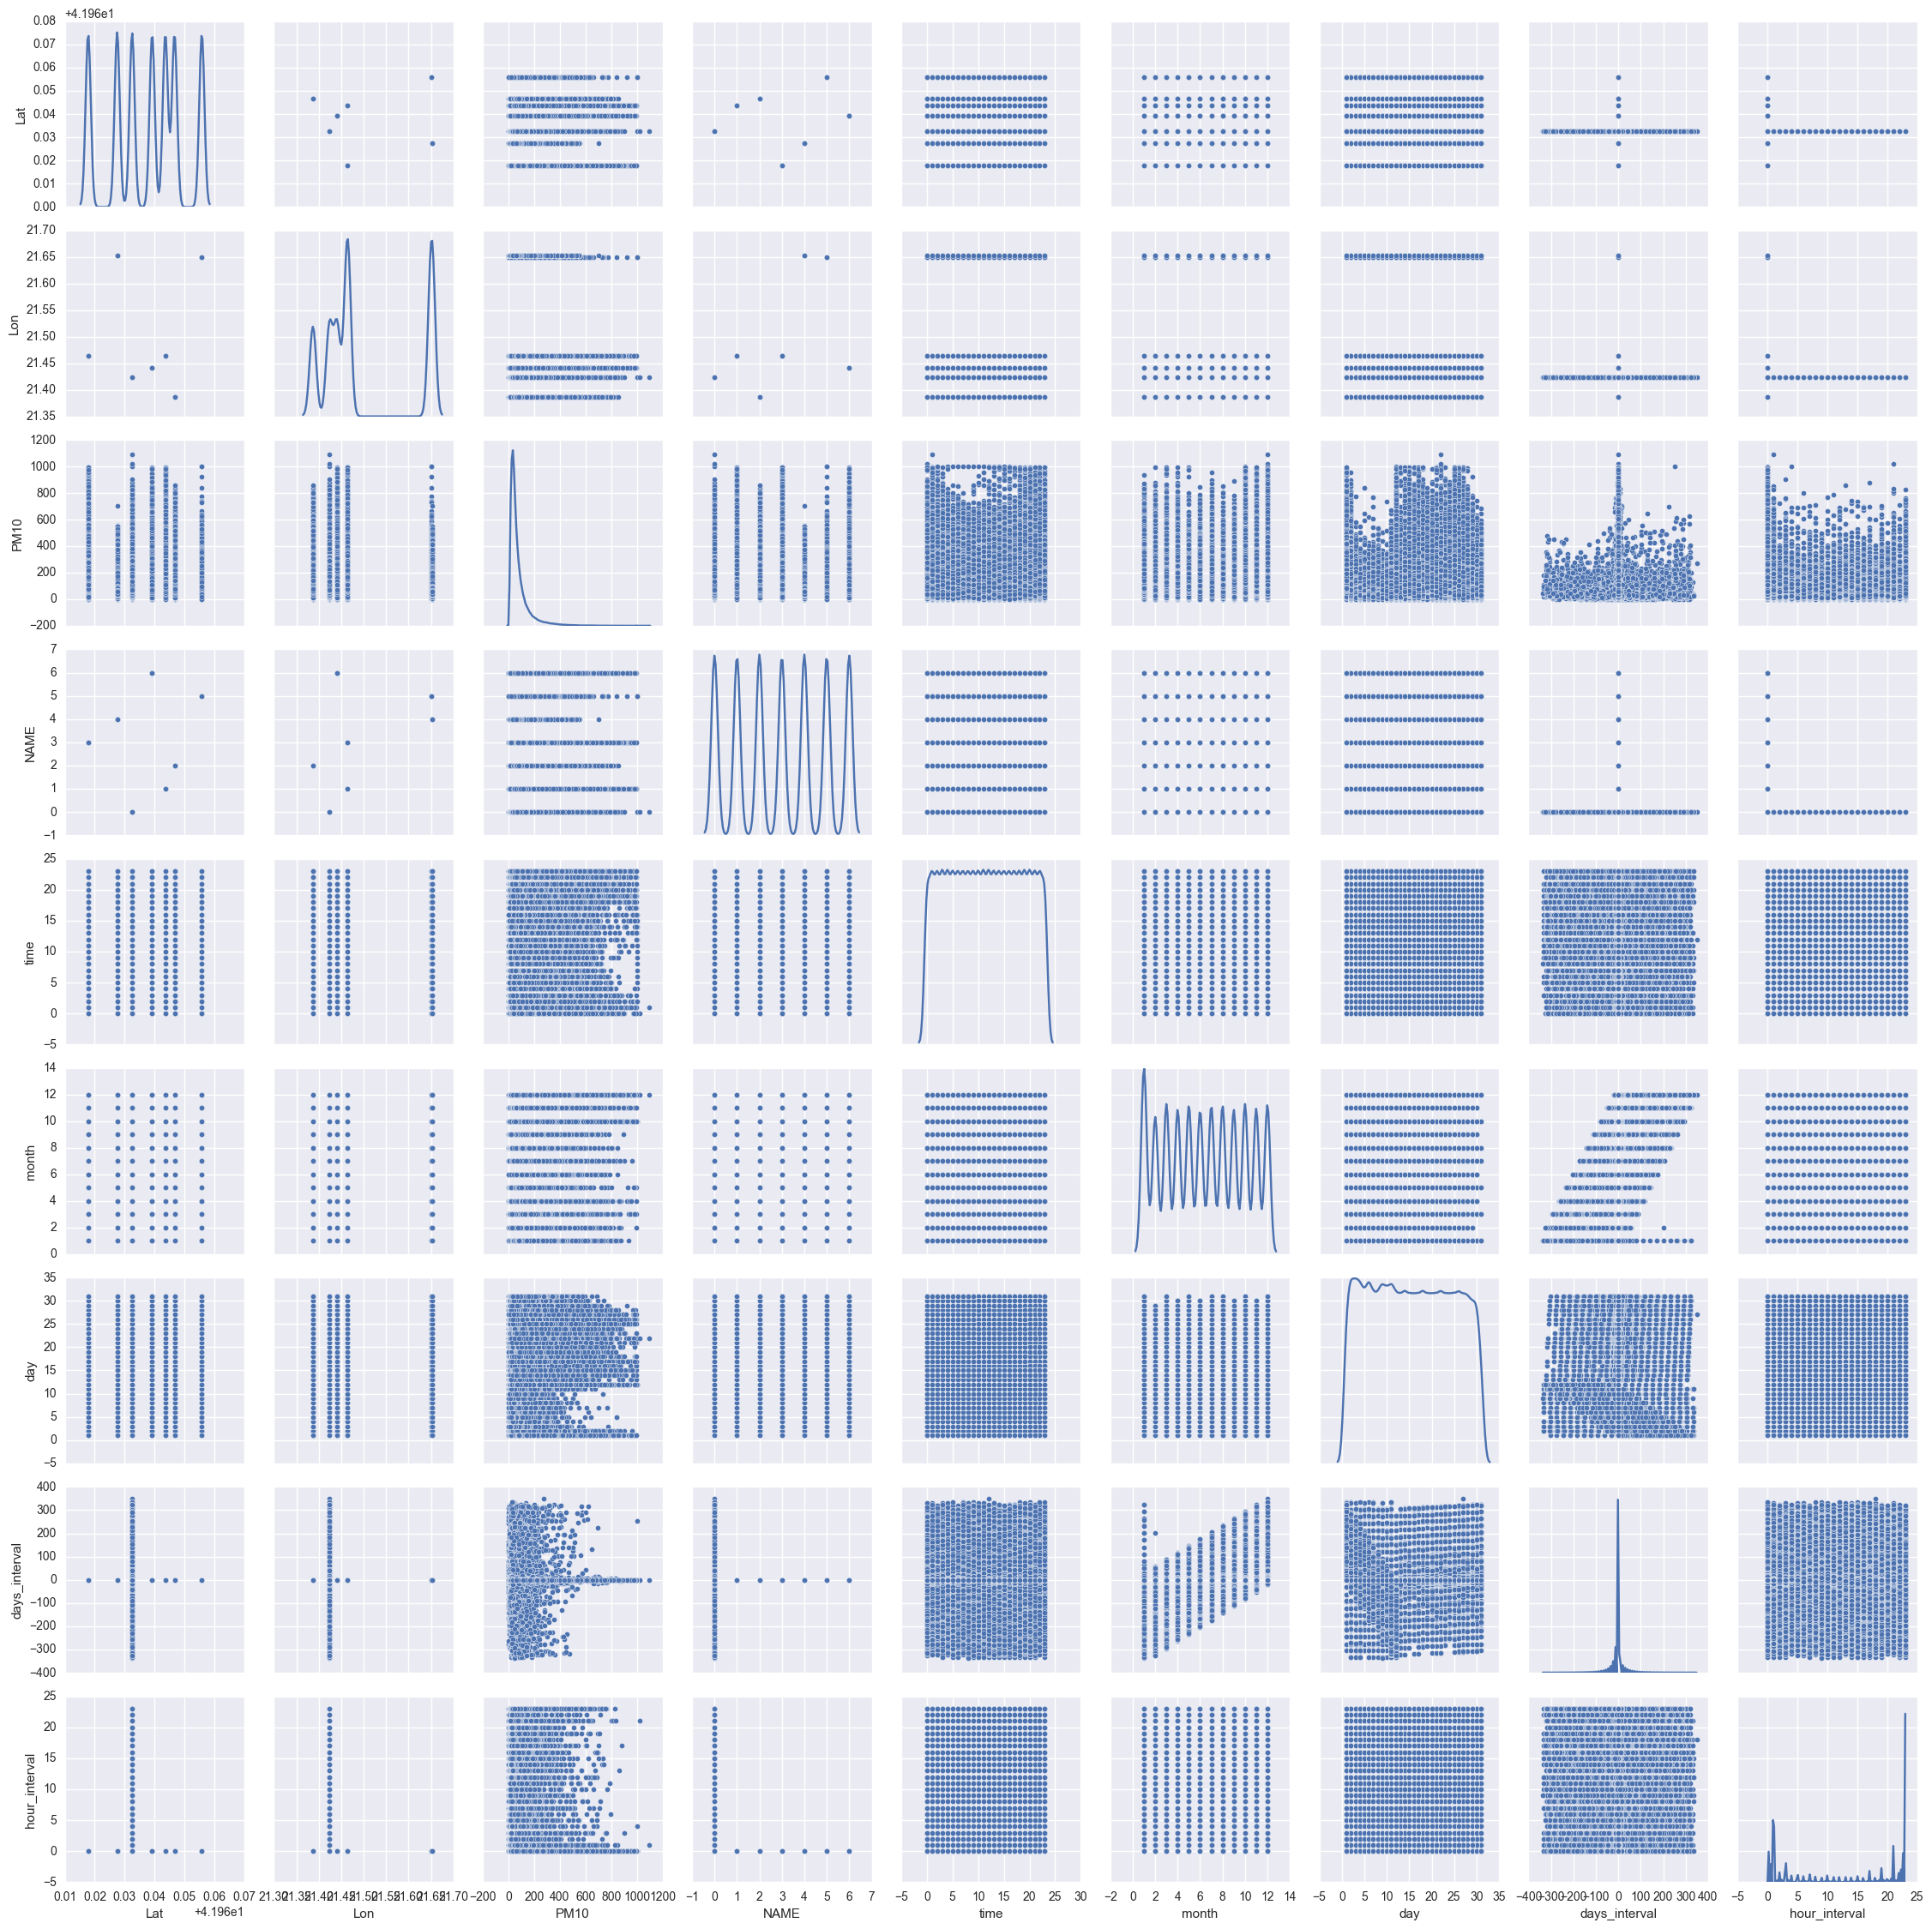

In [302]:
sns.pairplot(pandasCollector,diag_kind='kde')